### Pollen Concentration Data

#### Where to find the data: 

URL: https://drive.google.com/uc?id=1R-4JGmH2_tYcew9iAAju-RINplTiXV6N

The entire historical archive of pollen concentration data collected up to December 31 of the year preceding the current one. 
Stations are identified by BCODE, the description of which is provided here: https://github.com/ARPA-SIMC/dballe/blob/master/doc/fapi_btable.md


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('/Users/alket/code/data/old.csv')

In [48]:
data.shape

(5506185, 6)

In [49]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

### Shape of data and number of Observatory Stations

In [50]:
data.shape

(5506185, 5)

In [51]:
data['id_staz'].value_counts()

id_staz
4179    486824
4181    430840
4186    430792
4178    429389
4189    426062
4187    416120
4182    413037
4188    401544
4176    400216
4177    388371
4185    388319
4190    372200
4184    363819
4180    156468
1         2184
Name: count, dtype: int64

In [52]:
data = data.sort_values(by = "date", ascending=True, ignore_index=True)
data

,id_staz,id_poll,date,valore,mod
0,4179,B48004,1987-03-03,107.00,1.0
1,4182,B48007,1987-03-03,0.00,1.0
2,4181,B48007,1987-03-03,0.00,1.0
3,4182,B48004,1987-03-03,12.00,1.0
4,4181,B48004,1987-03-03,51.00,1.0
...,...,...,...,...,...
5506180,4185,B48081,2023-12-31,0.00,NaN
5506181,4179,B48012,2023-12-31,0.00,NaN
5506182,4185,B48082,2023-12-31,0.00,NaN
5506183,4185,B48039,2023-12-31,0.92,NaN


### Translating column names in English

In [53]:
data.columns = ['observatory_id', 'pollen_id', 'date', 'value', 'mod']

In [54]:
data

,observatory_id,pollen_id,date,value,mod
0,4179,B48004,1987-03-03,107.00,1.0
1,4182,B48007,1987-03-03,0.00,1.0
2,4181,B48007,1987-03-03,0.00,1.0
3,4182,B48004,1987-03-03,12.00,1.0
4,4181,B48004,1987-03-03,51.00,1.0
...,...,...,...,...,...
5506180,4185,B48081,2023-12-31,0.00,NaN
5506181,4179,B48012,2023-12-31,0.00,NaN
5506182,4185,B48082,2023-12-31,0.00,NaN
5506183,4185,B48039,2023-12-31,0.92,NaN


### Group by Observatory ID and by Pollen ID

In [58]:
gbo = data.groupby("observatory_id")

In [59]:
obs_4185 = gbo.get_group(4185)
obs_4185

,observatory_id,pollen_id,date,value,mod
9966,4185,B48007,1991-06-04,3.00,1.0
9973,4185,B48004,1991-06-04,1.00,1.0
9980,4185,B48007,1991-06-05,4.00,1.0
9994,4185,B48004,1991-06-05,0.00,1.0
9996,4185,B48004,1991-06-06,0.00,1.0
...,...,...,...,...,...
5506177,4185,B48079,2023-12-31,0.00,NaN
5506179,4185,B48080,2023-12-31,0.00,NaN
5506180,4185,B48081,2023-12-31,0.00,NaN
5506182,4185,B48082,2023-12-31,0.00,NaN


In [60]:
gb_p_id = obs_4185.groupby('pollen_id')

### B48039 == Spore fungine_Alternaria

In [61]:
data_B48039 = gb_p_id.get_group('B48039')
data_B48039

,observatory_id,pollen_id,date,value,mod
108071,4185,B48039,1999-01-02,0.34,1.0
108753,4185,B48039,1999-01-03,0.68,1.0
108893,4185,B48039,1999-01-04,1.36,1.0
109220,4185,B48039,1999-01-05,0.00,1.0
109753,4185,B48039,1999-01-06,0.00,1.0
...,...,...,...,...,...
5501530,4185,B48039,2023-12-27,NaN,NaN
5502828,4185,B48039,2023-12-28,NaN,NaN
5503908,4185,B48039,2023-12-29,0.46,NaN
5504392,4185,B48039,2023-12-30,0.00,NaN


### Sort the data and visualize it

In [63]:
data_B48039 = data_B48039.sort_values(by = "date", ascending=True, ignore_index=True)

In [75]:
data2viz = data_B48039[['date', 'value']]
data2viz = data2viz.set_index('date')
data2viz = data2viz[:120]

In [76]:
data2viz

,value
date,
1999-01-02,0.34
1999-01-03,0.68
1999-01-04,1.36
1999-01-05,0.00
1999-01-06,0.00
...,...
1999-04-27,12.58
1999-04-28,3.06
1999-04-29,1.70


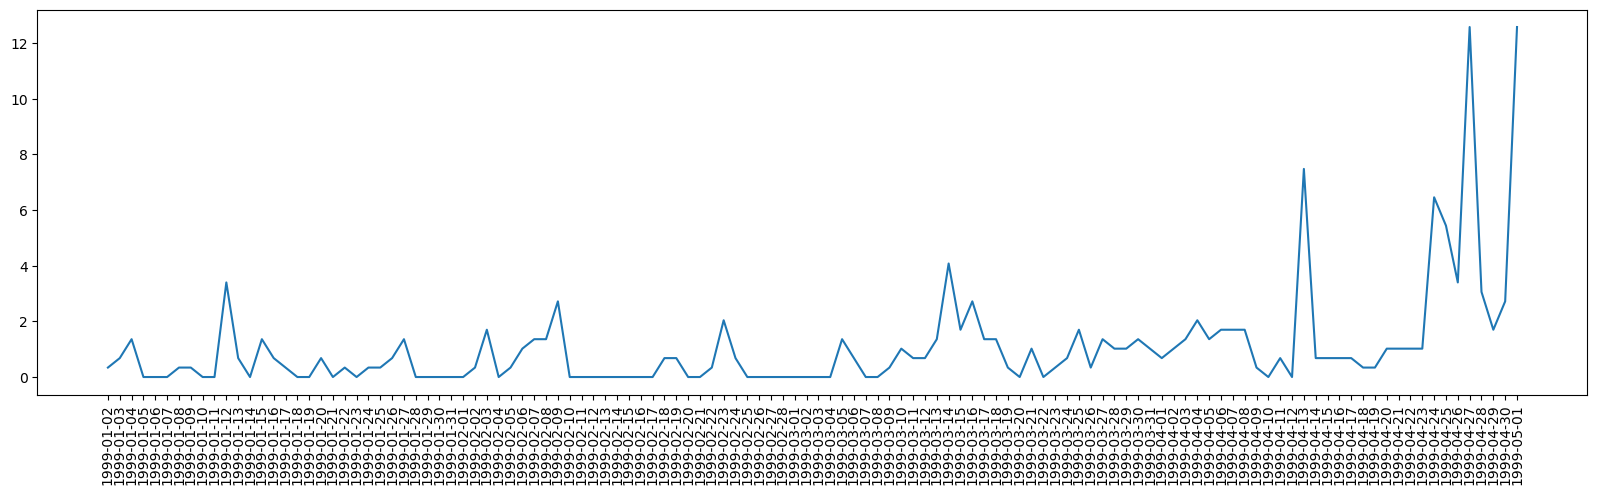

In [77]:
plt.figure(figsize = (20, 5))
plt.plot(data2viz)
plt.xticks(rotation = 90)

plt.show()

#### Visualize the data as monthly average 

In [70]:
def get_month(x): 
    return x.split('-')[1]
data_B48039['month'] = data_B48039['date'].apply(lambda x: get_month(x))

In [71]:
data_B48039

,observatory_id,pollen_id,date,value,mod,month
0,4185,B48039,1999-01-02,0.34,1.0,01
1,4185,B48039,1999-01-03,0.68,1.0,01
2,4185,B48039,1999-01-04,1.36,1.0,01
3,4185,B48039,1999-01-05,0.00,1.0,01
4,4185,B48039,1999-01-06,0.00,1.0,01
...,...,...,...,...,...,...
8806,4185,B48039,2023-12-27,NaN,NaN,12
8807,4185,B48039,2023-12-28,NaN,NaN,12
8808,4185,B48039,2023-12-29,0.46,NaN,12
8809,4185,B48039,2023-12-30,0.00,NaN,12


In [72]:
gbm = data_B48039.groupby('month')

In [73]:
averages = []
months = []
for i, k in gbm: 
    print(i)
    mean = k['value'].mean()
    averages.append(mean)
    months.append(i)

01
02
03
04
05
06
07
08
09
10
11
12


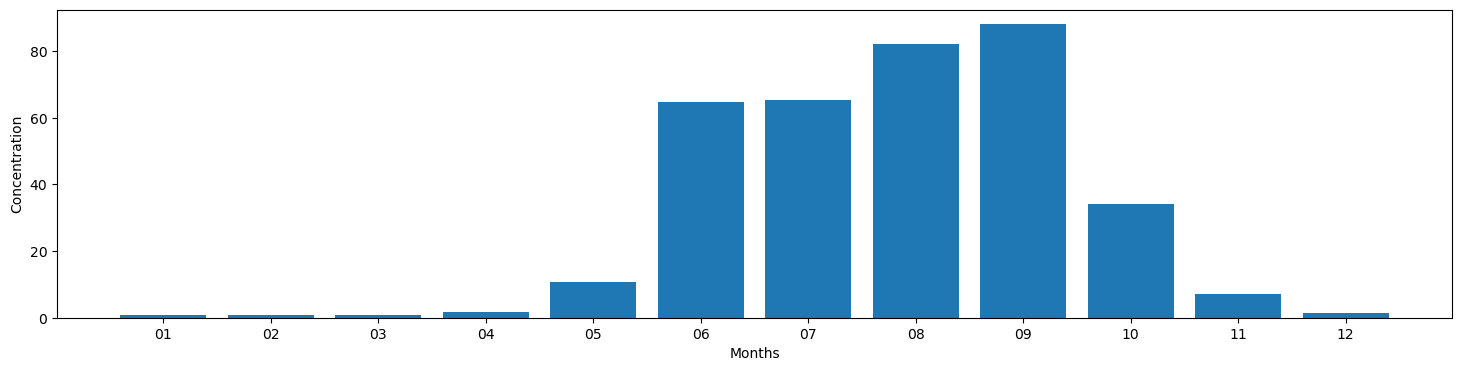

In [74]:
plt.figure(figsize = (18, 4))
plt.bar(months , averages)
plt.xlabel("Months")
plt.ylabel("Concentration", )
plt.show()